In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import torch
from torch import nn
import torchmetrics

/Users/panththaker/Projects/JupyterNotebooks/tfvenv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/panththaker/Projects/JupyterNotebooks/tfvenv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/panththaker/Projects/JupyterNotebooks/tfvenv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at

In [2]:
disease_data = pd.read_csv("data/DiseaseAndSymptoms.csv")
disease_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
diseases = disease_data.Disease.unique().tolist()
diseases[:5]

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction']

In [4]:
symptoms_set = set()

# Iterate through each symptom column (except first column 'Disease')
for col in disease_data.columns[1:]:

    col_values = disease_data[col].tolist()

    for val in col_values:
        if pd.notna(val):
            stripped_val = val.strip()
            symptoms_set.add(stripped_val)

symptoms = list(symptoms_set)
symptoms.sort()

print(symptoms[:5])

['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium']


In [5]:
print(f"Number of Diseases: {len(diseases)}\nNumber of Unique Symptoms: {len(symptoms)}")

Number of Diseases: 41
Number of Unique Symptoms: 131


In [6]:
disease_indexes = {diseases[i]: i for i in range(len(diseases))}
print(disease_indexes)

{'Fungal infection': 0, 'Allergy': 1, 'GERD': 2, 'Chronic cholestasis': 3, 'Drug Reaction': 4, 'Peptic ulcer diseae': 5, 'AIDS': 6, 'Diabetes ': 7, 'Gastroenteritis': 8, 'Bronchial Asthma': 9, 'Hypertension ': 10, 'Migraine': 11, 'Cervical spondylosis': 12, 'Paralysis (brain hemorrhage)': 13, 'Jaundice': 14, 'Malaria': 15, 'Chicken pox': 16, 'Dengue': 17, 'Typhoid': 18, 'hepatitis A': 19, 'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23, 'Alcoholic hepatitis': 24, 'Tuberculosis': 25, 'Common Cold': 26, 'Pneumonia': 27, 'Dimorphic hemmorhoids(piles)': 28, 'Heart attack': 29, 'Varicose veins': 30, 'Hypothyroidism': 31, 'Hyperthyroidism': 32, 'Hypoglycemia': 33, 'Osteoarthristis': 34, 'Arthritis': 35, '(vertigo) Paroymsal  Positional Vertigo': 36, 'Acne': 37, 'Urinary tract infection': 38, 'Psoriasis': 39, 'Impetigo': 40}


In [7]:
symptom_indexes = {symptoms[i]: i for i in range(len(symptoms))}
print(symptom_indexes)

{'abdominal_pain': 0, 'abnormal_menstruation': 1, 'acidity': 2, 'acute_liver_failure': 3, 'altered_sensorium': 4, 'anxiety': 5, 'back_pain': 6, 'belly_pain': 7, 'blackheads': 8, 'bladder_discomfort': 9, 'blister': 10, 'blood_in_sputum': 11, 'bloody_stool': 12, 'blurred_and_distorted_vision': 13, 'breathlessness': 14, 'brittle_nails': 15, 'bruising': 16, 'burning_micturition': 17, 'chest_pain': 18, 'chills': 19, 'cold_hands_and_feets': 20, 'coma': 21, 'congestion': 22, 'constipation': 23, 'continuous_feel_of_urine': 24, 'continuous_sneezing': 25, 'cough': 26, 'cramps': 27, 'dark_urine': 28, 'dehydration': 29, 'depression': 30, 'diarrhoea': 31, 'dischromic _patches': 32, 'distention_of_abdomen': 33, 'dizziness': 34, 'drying_and_tingling_lips': 35, 'enlarged_thyroid': 36, 'excessive_hunger': 37, 'extra_marital_contacts': 38, 'family_history': 39, 'fast_heart_rate': 40, 'fatigue': 41, 'fluid_overload': 42, 'foul_smell_of urine': 43, 'headache': 44, 'high_fever': 45, 'hip_joint_pain': 46, '

In [8]:
patient_dataset = []
label_dataset = []

for i, row in disease_data.iterrows():
    # Initialize zero vectors for symptoms and diseases
    patient_symptoms = np.zeros(len(symptoms), dtype=np.float32)
    patient_label = np.zeros(len(diseases), dtype=np.float32)

    # Mark the disease label as one-hot
    disease = row['Disease']  # disease is in first column
    patient_label[disease_indexes[disease]] = 1.0

    # Iterate through symptom columns (all except Disease column)
    for col in disease_data.columns[1:]:
        symptom = row[col]
        if pd.isna(symptom):
            # Stop if symptom is NaN (no more symptoms)
            break
        else:
            symptom = symptom.strip()  # just in case
            patient_symptoms[symptom_indexes[symptom]] = 1.0

    # Append to dataset lists
    patient_dataset.append(patient_symptoms)
    label_dataset.append(patient_label)

In [9]:
data = torch.tensor(np.array(patient_dataset), dtype=torch.float32)
labels = torch.tensor(np.array(label_dataset), dtype=torch.float32)

In [10]:
class SymptomClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    def forward(self, input):
        return self.model(input)

In [11]:
torch.manual_seed(42)
np.random.seed(42)

indexes = np.arange(0, len(data), 1)
np.random.shuffle(indexes)

split = int(0.8 * len(data))
X_train, y_train = data[indexes[:split]], labels[indexes[:split]]
X_test, y_test = data[indexes[split:]], labels[indexes[split:]]


In [12]:
classifier = SymptomClassifier(data.shape[-1], labels.shape[-1])

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(classifier.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task='multiclass', num_classes=41)

In [13]:
train_accuracy = []
test_accuracy = []

epochs = 1000
for epoch in range(epochs):
    classifier.train()
    preds = classifier(X_train)
    loss = loss_fn(preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_accuracy.append(accuracy_fn(classifier(X_train), y_train.argmax(dim=-1)).item())
    
    classifier.eval()
    with torch.inference_mode():
        test_accuracy.append(accuracy_fn(classifier(X_test), y_test.argmax(dim=-1)).item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: {loss} {test_accuracy[-1]}")

Epoch 0: 3.7181906700134277 0.027439024299383163
Epoch 50: 3.6692161560058594 0.08231707662343979
Epoch 100: 3.5983424186706543 0.1148374006152153
Epoch 150: 3.452941417694092 0.19105690717697144
Epoch 200: 3.0979628562927246 0.35060974955558777
Epoch 250: 2.4387757778167725 0.5254064798355103
Epoch 300: 1.639309048652649 0.875
Epoch 350: 0.9235301613807678 0.9969512224197388
Epoch 400: 0.4849703311920166 1.0
Epoch 450: 0.2659037709236145 0.9979674816131592
Epoch 500: 0.15943840146064758 0.9979674816131592
Epoch 550: 0.10495038330554962 0.9979674816131592
Epoch 600: 0.07467368990182877 0.9979674816131592
Epoch 650: 0.0564165897667408 0.9979674816131592
Epoch 700: 0.044597066938877106 1.0
Epoch 750: 0.03647752106189728 1.0
Epoch 800: 0.030633097514510155 1.0
Epoch 850: 0.0262655857950449 1.0
Epoch 900: 0.02289625070989132 1.0
Epoch 950: 0.020228253677487373 1.0


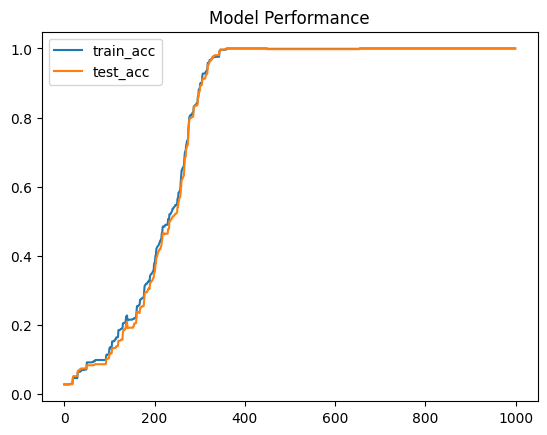

In [14]:
plt.title("Model Performance")
plt.plot([i for i in range(epochs)], train_accuracy, label='train_acc')
plt.plot([i for i in range(epochs)], test_accuracy, label='test_acc')
plt.legend()
plt.show()


In [15]:
torch.save(classifier.state_dict(), "symptom_model_weights.pth")
loaded_model = SymptomClassifier(input_size=data.shape[1], num_classes=labels.shape[1])
loaded_model.load_state_dict(torch.load("symptom_model_weights.pth"))
loaded_model.eval()

SymptomClassifier(
  (model): Sequential(
    (0): Linear(in_features=131, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=41, bias=True)
  )
)

In [16]:
def predict_disease(symptom_list, model, symptom_index_map, disease_list):
    # Create zero input vector for symptoms
    input_vector = np.zeros(len(symptom_index_map), dtype=np.float32)

    # Mark symptoms present
    for symptom in symptom_list:
        if symptom in symptom_index_map:
            idx = symptom_index_map[symptom]
            input_vector[idx] = 1.0
        else:
            print(f"Warning: '{symptom}' not in symptom list")

    # Convert to tensor and add batch dimension
    input_tensor = torch.tensor(input_vector).unsqueeze(0)  # shape [1, num_symptoms]

    # Move tensor to model's device (CPU or GPU)
    device = next(model.parameters()).device
    input_tensor = input_tensor.to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)  # shape [1, num_diseases]
        predicted_index = torch.argmax(output, dim=1).item()

    return disease_list[predicted_index]


In [17]:
symptoms_array = [
    "chills",
    "vomiting",
    "high_fever",
    "sweating",
    "headache",
    "nausea",
    "muscle_pain"
]

predicted = predict_disease(symptoms_array, classifier, symptom_indexes, diseases)
print(f"Predicted disease: {predicted}")

Predicted disease: Malaria
